In [2]:
import numpy as np
import pytubefix
import torch
from torch import utils
import tensorflow as tf
import matplotlib as plt

2025-11-02 01:20:58.541050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from pytubefix import YouTube
yt = YouTube('https://www.youtube.com/watch?v=l3NJNFmg09k')
yt.streams.first().download()

'/workspaces/bluemath19/CS6613-Assignments/assignments/assignment-3/Football match.mp4'

In [7]:
#task 1 - YOLO
from ultralytics import YOLO

#pre-trained model
model = YOLO('yolo11n.pt')
model.eval()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/vscode/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [8]:
#get intermediate layers
intermediate_layers = {}
def get_layers():
  def hook(model, input, output):
    intermediate_layers[model] = output.detach()
  return hook

for name, module in model.named_modules():
  if isinstance(module, torch.nn.Conv2d):
    module.register_forward_hook(get_layers())


In [11]:
import cv2
from ultralytics import YOLO

target_classes = [0,32]
target_frame = 0
video_path = '/workspaces/bluemath19/CS6613-Assignments/assignments/assignment-3/Football match.mp4'
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)

read,frame = cap.read()
if read:
  results = model(frame, classes = target_classes)
  annotated_frame = results[0].plot()
  cv2.imshow('result', annotated_frame)

  if len(results[0].boxes) > 0:
    classes = results[0].boxes.cls.cpu().numpy()
    person_count = np.sum(classes == 0)
    ball_count = np.sum(classes == 32)
    print(f"Person count: {person_count}")
    print(f"Ball count: {ball_count}")
  else:
    print("No detections")

cap.release()


0: 384x640 6 persons, 1 sports ball, 195.5ms
Speed: 10.5ms preprocess, 195.5ms inference, 30.5ms postprocess per image at shape (1, 3, 384, 640)


QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)



Person count: 6
Ball count: 1


QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is not the object's thread (0x2c798f30).
Cannot move to target thread (0x2fb83e60)

QObject::moveToThread: Current thread (0x2fb83e60) is n

In [12]:
#display confidence levels and class of bb
import cv2
from ultralytics import YOLO
import numpy as np

for item in results[0].boxes:
  print(f"Class: {int(item.cls.cpu().numpy()[0])}, Confidence: {item.conf.cpu().numpy()[0]}")

Class: 0, Confidence: 0.8559147119522095
Class: 0, Confidence: 0.853502631187439
Class: 0, Confidence: 0.7495112419128418
Class: 0, Confidence: 0.7464063763618469
Class: 0, Confidence: 0.7396690845489502
Class: 0, Confidence: 0.7196471095085144
Class: 32, Confidence: 0.45086032152175903


Visualizing output of layer: Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


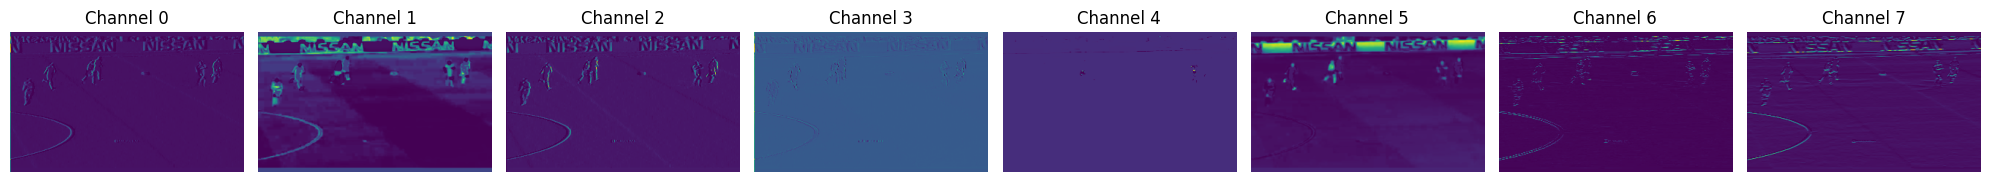

Visualizing output of layer: Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


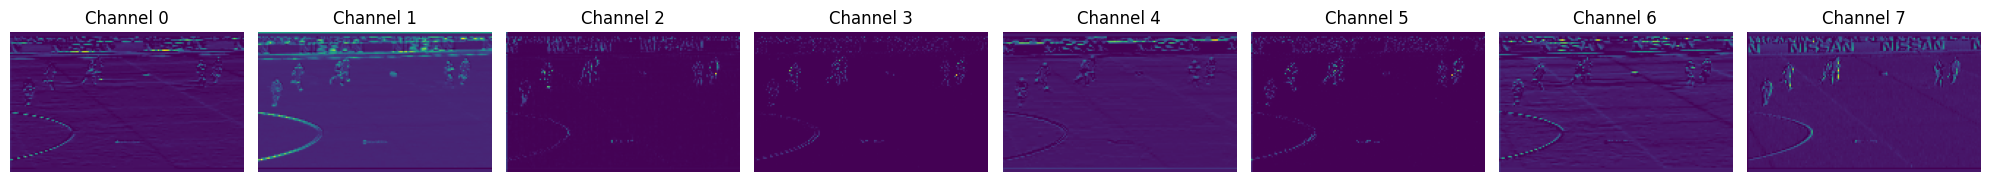

Visualizing output of layer: Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))


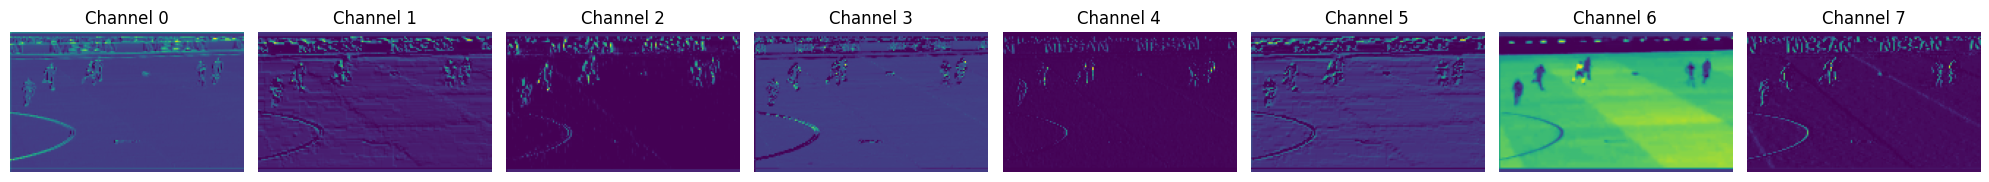

Visualizing output of layer: Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


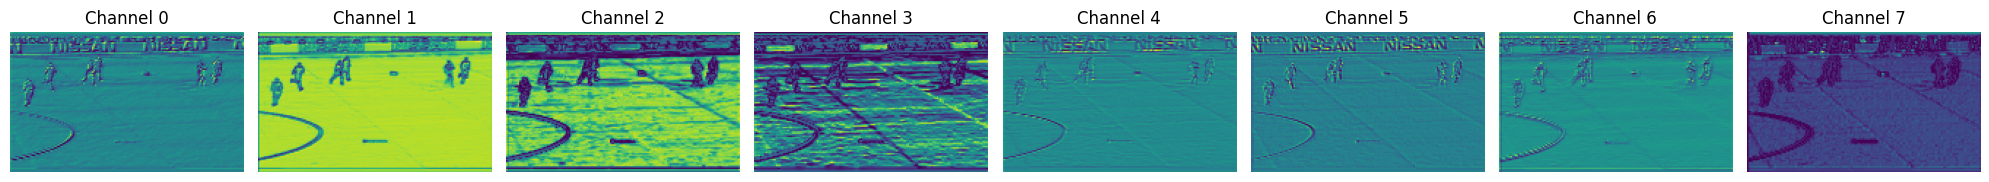

Visualizing output of layer: Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


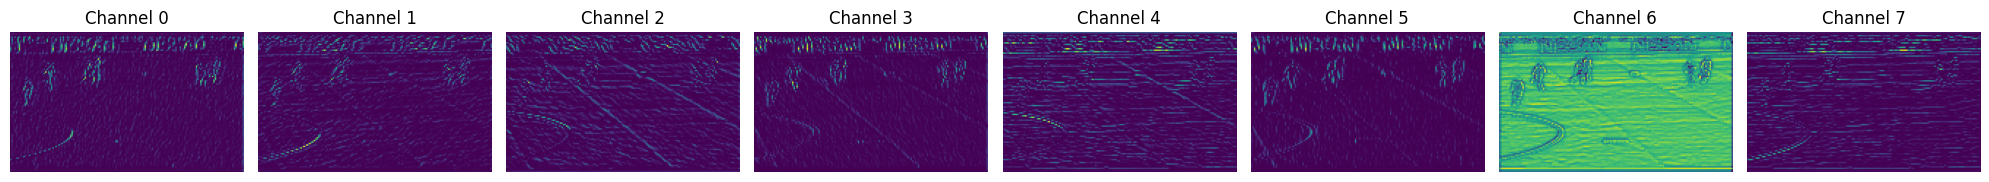

Visualizing output of layer: Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))


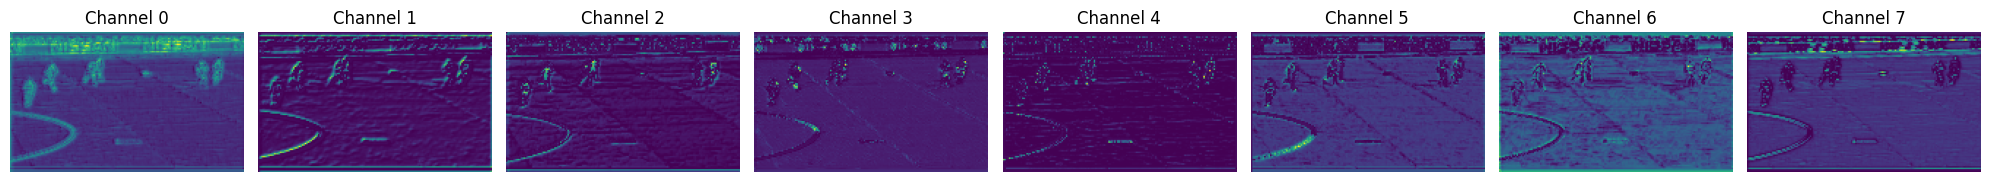

Visualizing output of layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


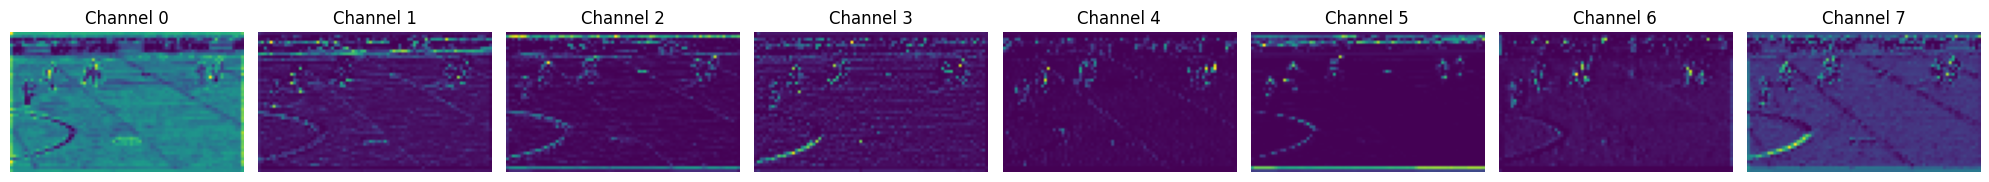

Visualizing output of layer: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))


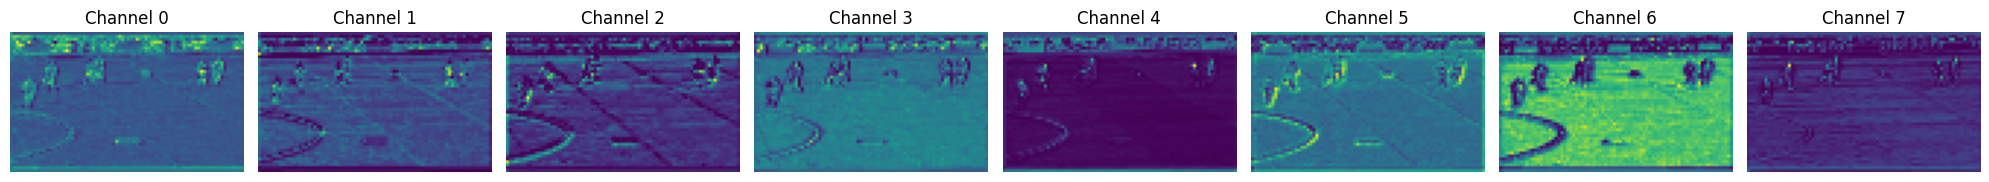

Visualizing output of layer: Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


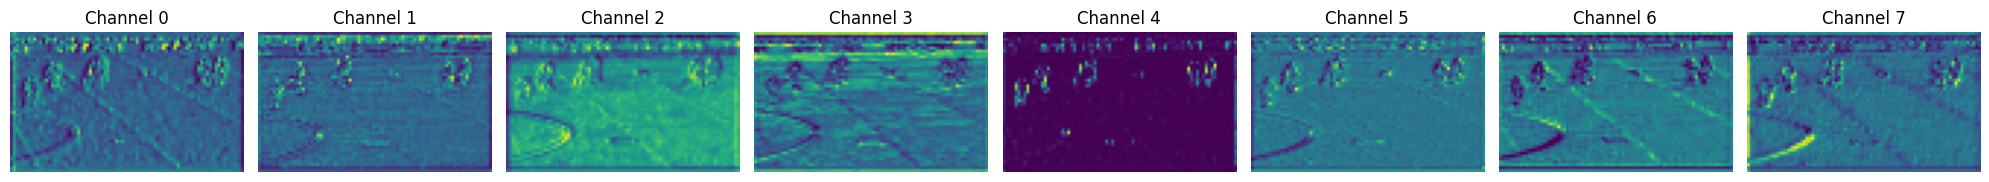

Visualizing output of layer: Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


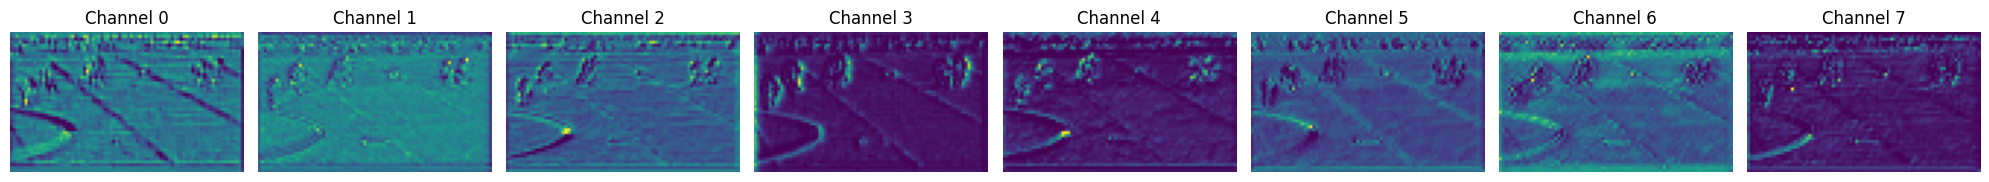

Visualizing output of layer: Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))


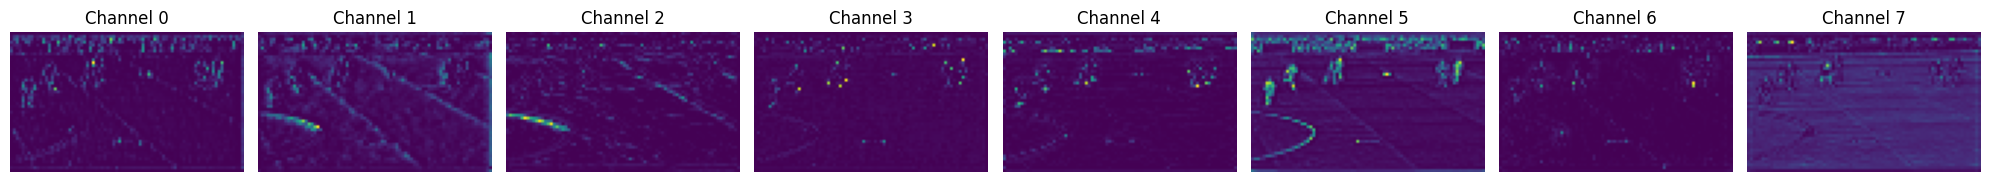

Visualizing output of layer: Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


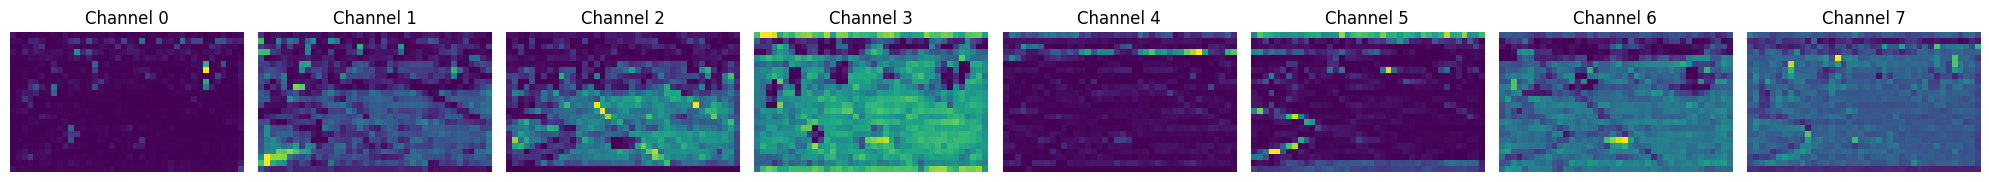

Visualizing output of layer: Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))


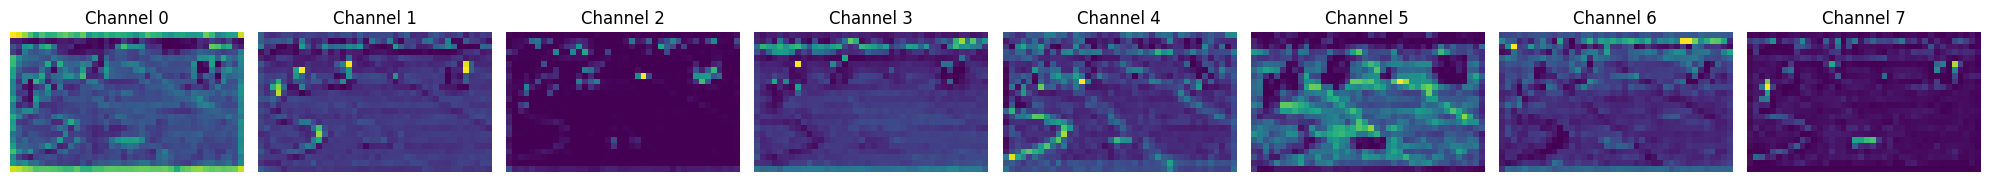

Visualizing output of layer: Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))


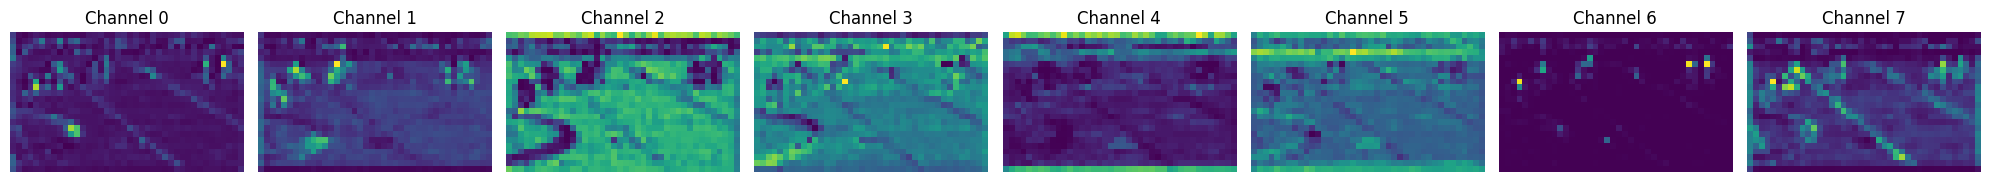

Visualizing output of layer: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


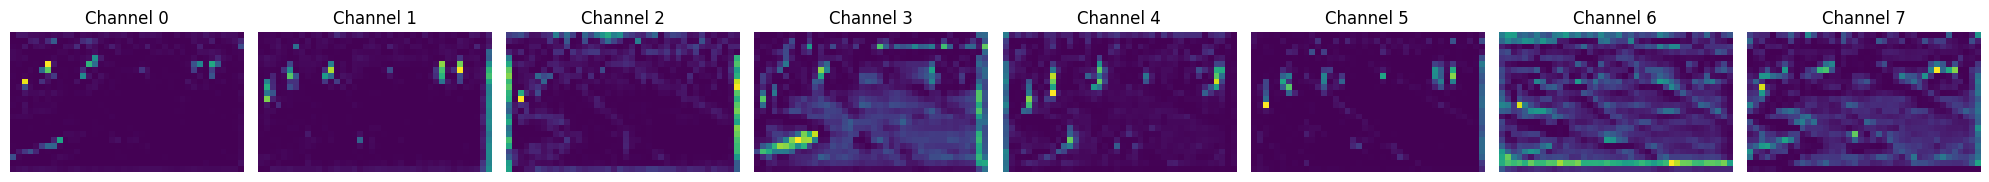

Visualizing output of layer: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


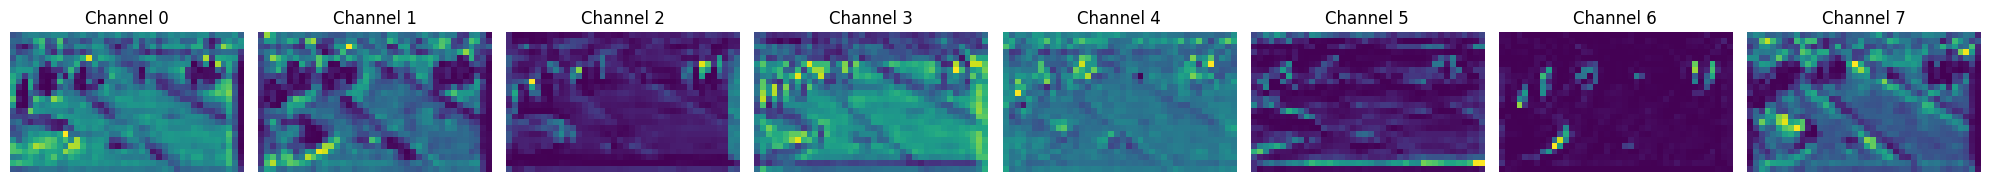

Visualizing output of layer: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


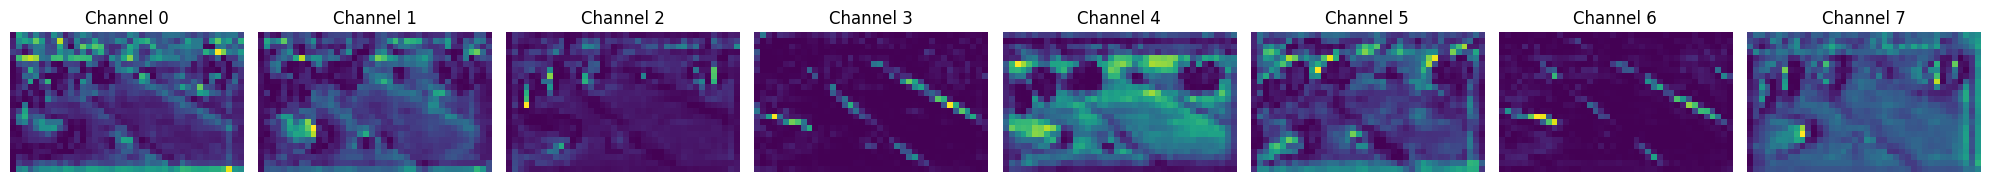

Visualizing output of layer: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


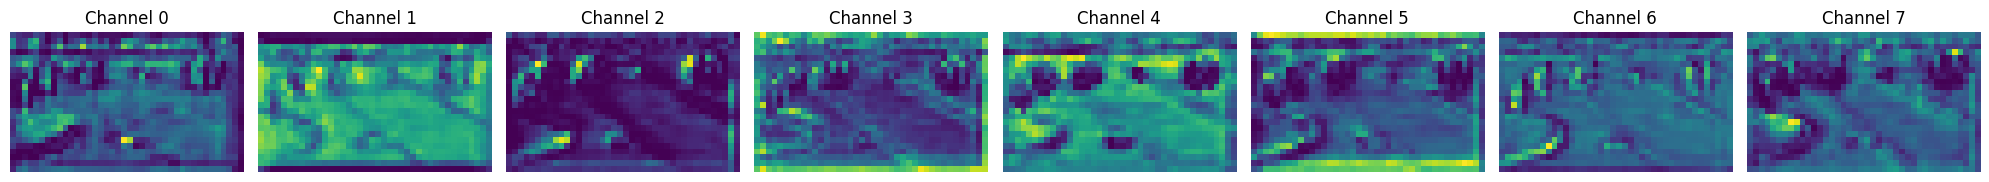

Visualizing output of layer: Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))


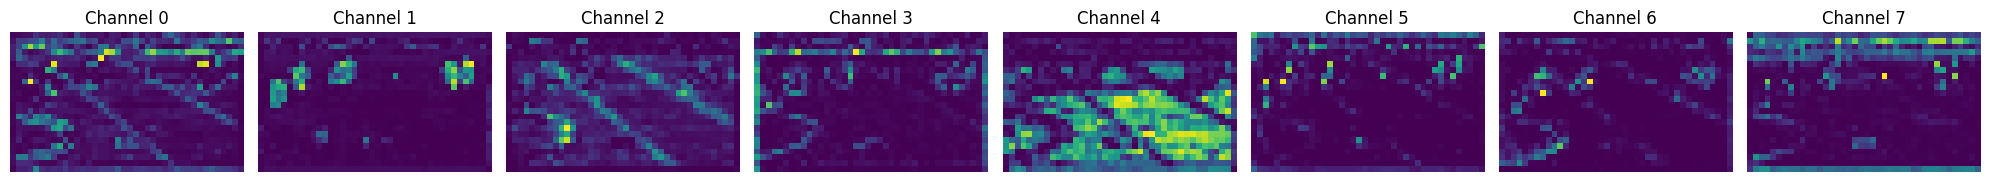

Visualizing output of layer: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))


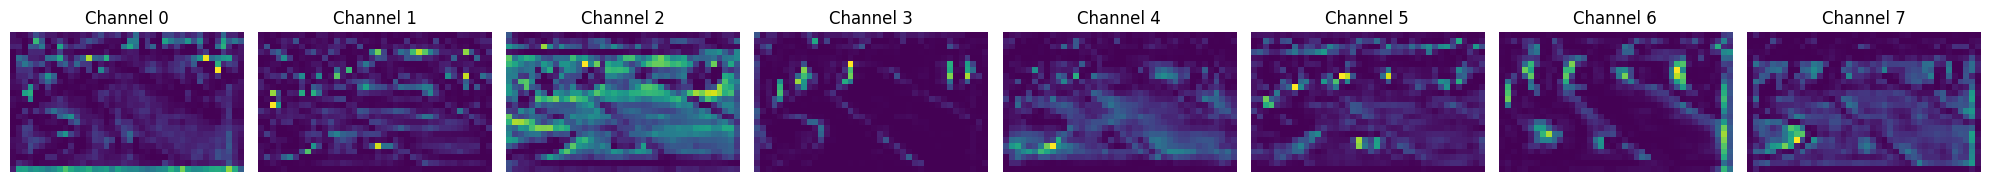

Visualizing output of layer: Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1))


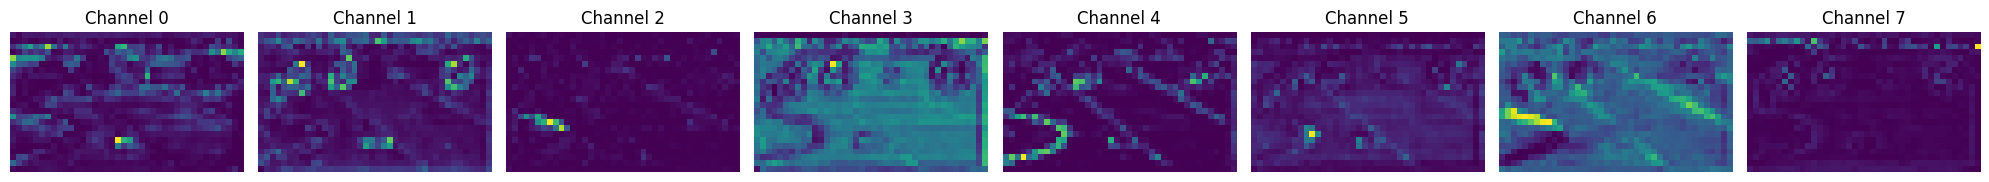

Visualizing output of layer: Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


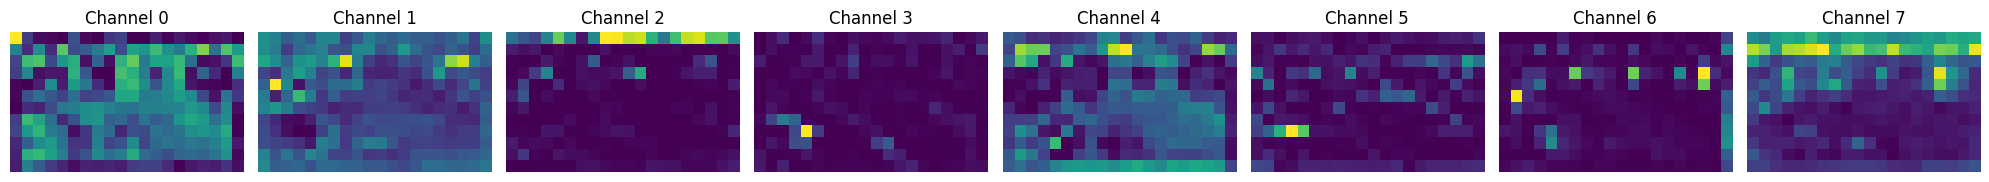

Visualizing output of layer: Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))


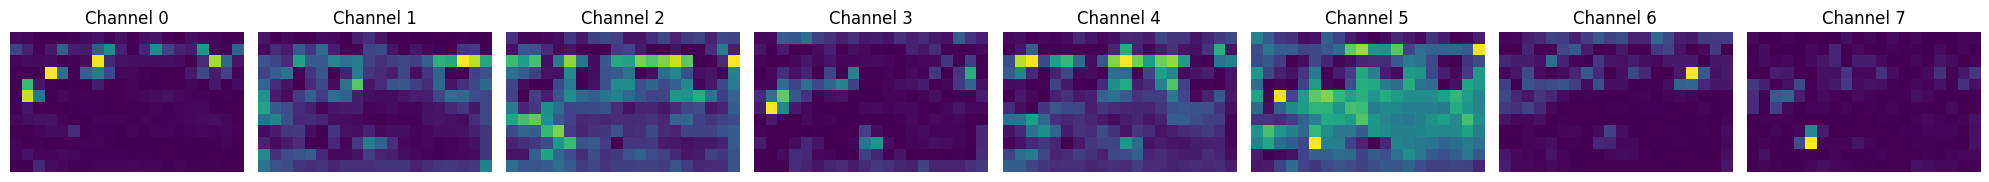

Visualizing output of layer: Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))


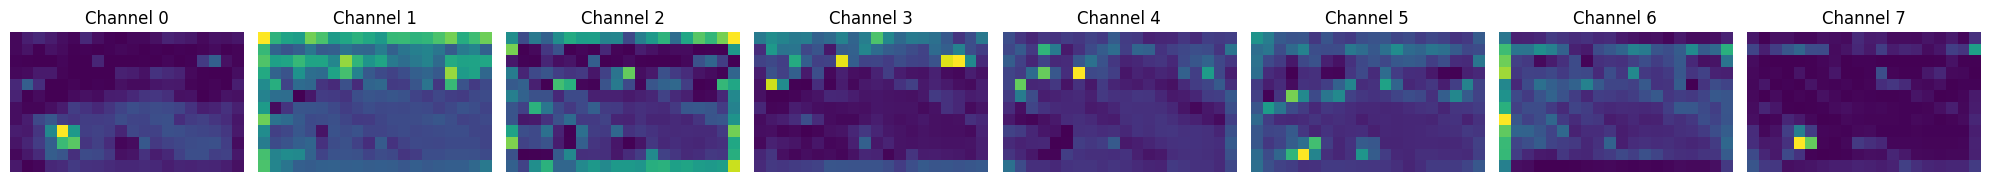

Visualizing output of layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


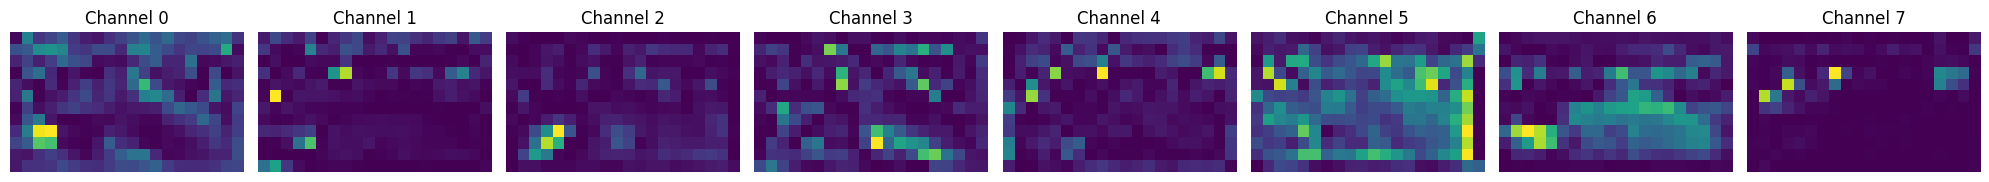

Visualizing output of layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


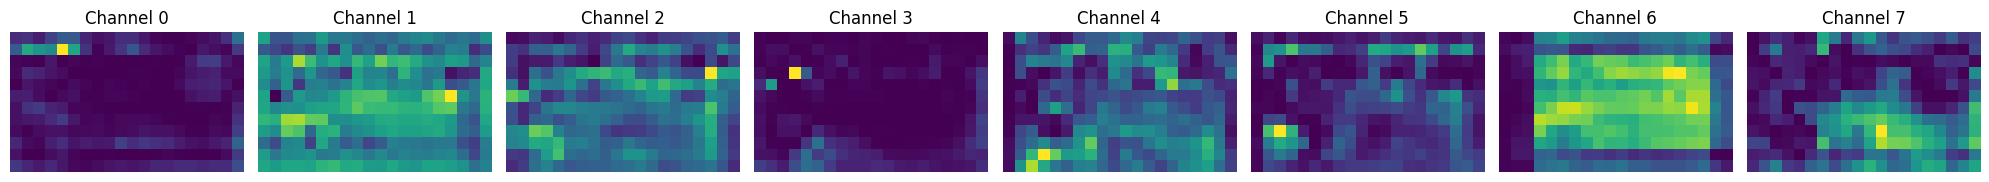

Visualizing output of layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


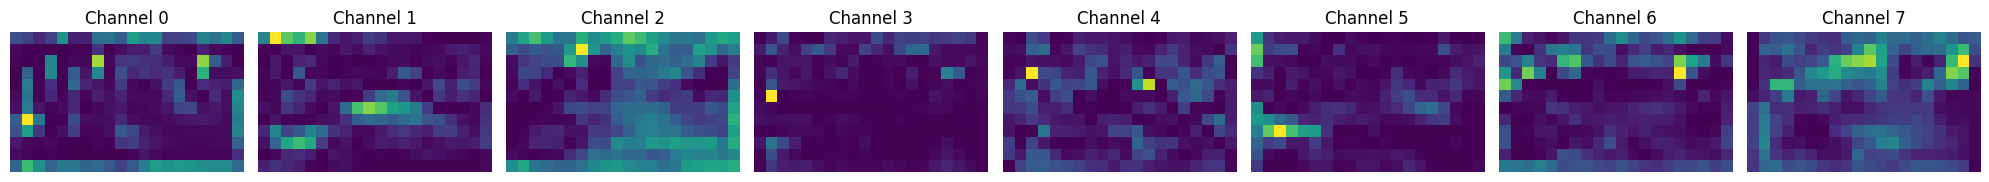

Visualizing output of layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


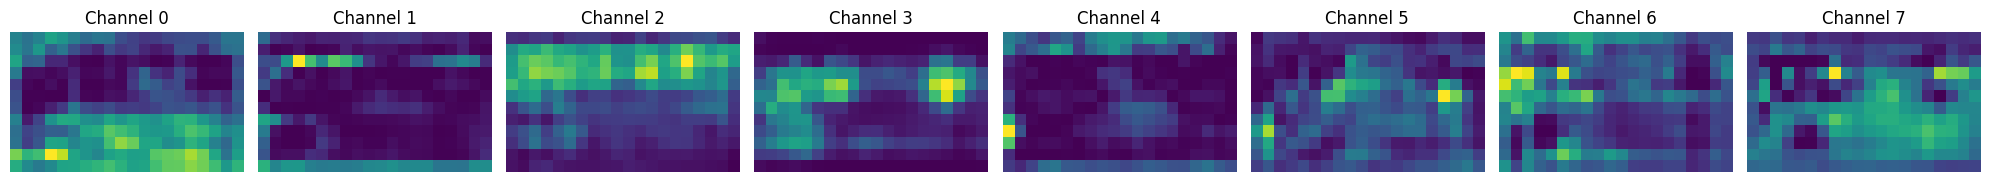

Visualizing output of layer: Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))


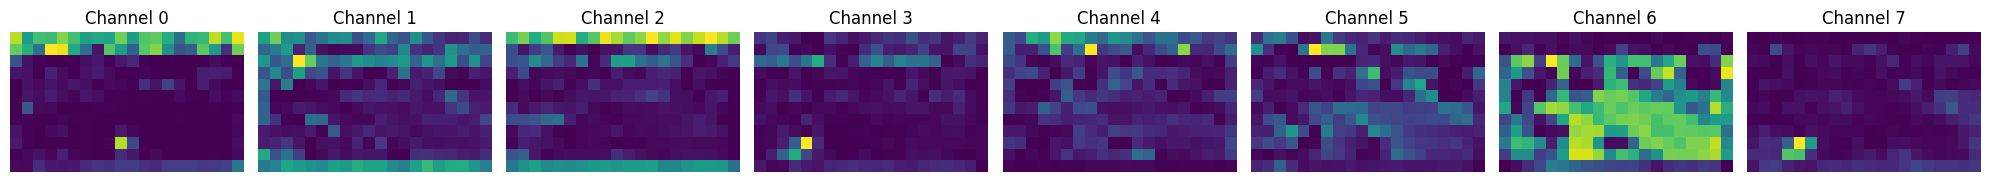

Visualizing output of layer: Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))


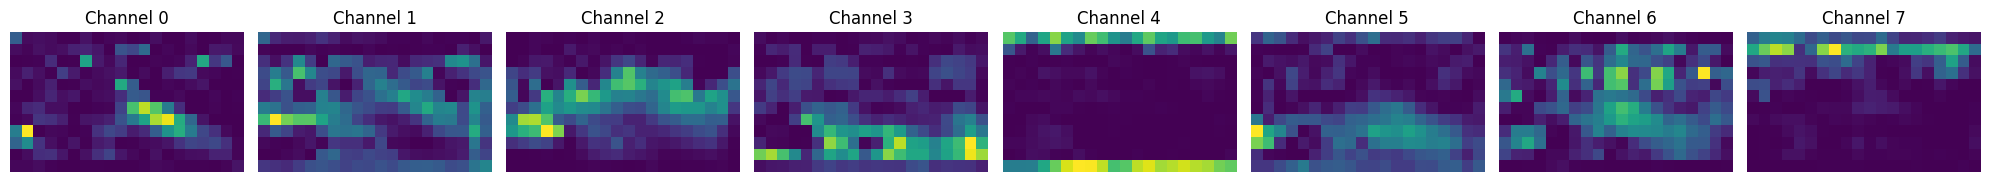

Visualizing output of layer: Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1))


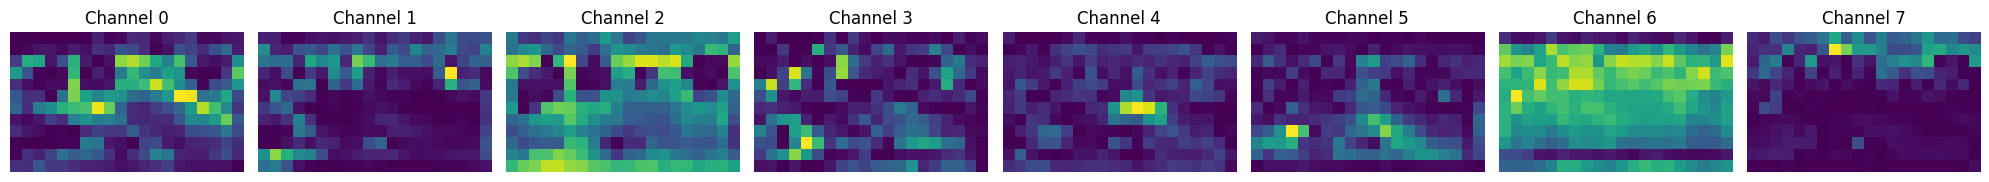

Visualizing output of layer: Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))


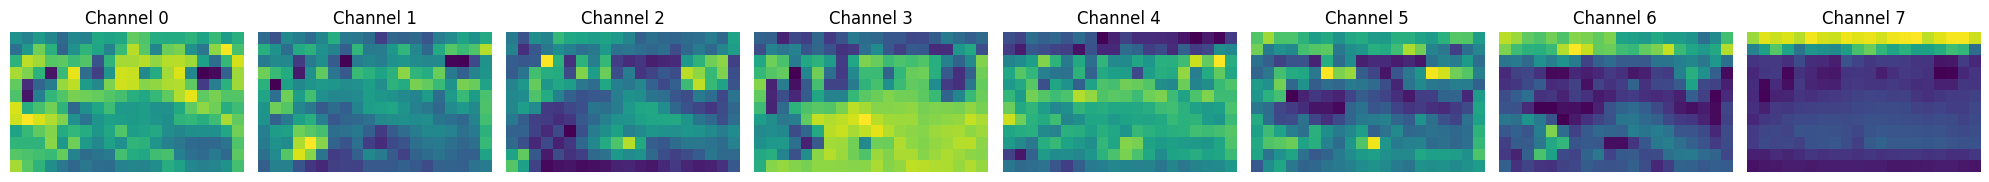

Visualizing output of layer: Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))


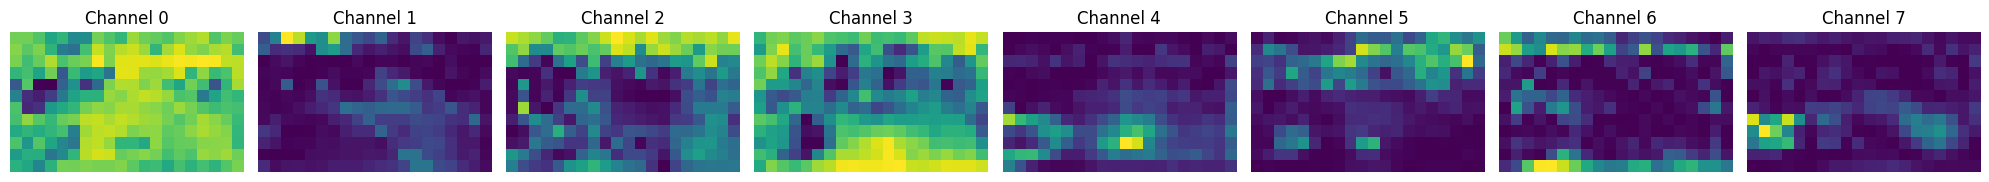

Visualizing output of layer: Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))


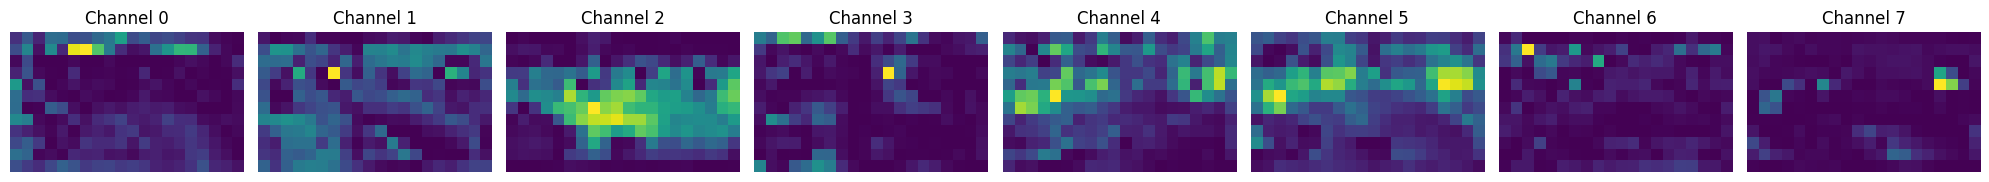

Visualizing output of layer: Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))


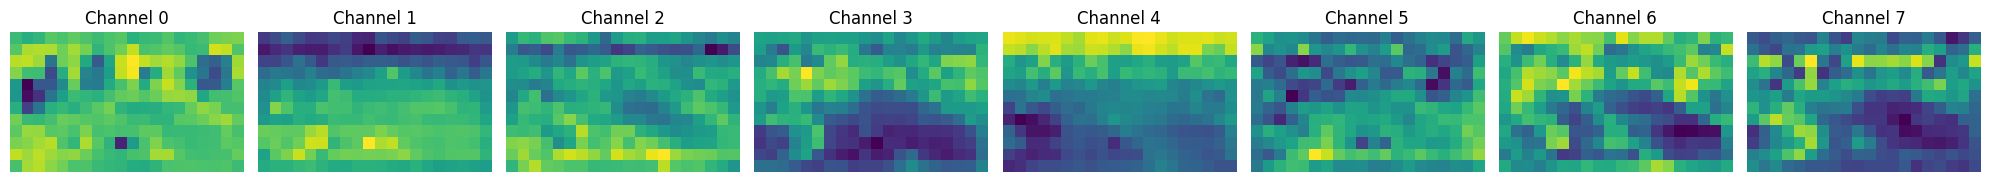

Visualizing output of layer: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128)


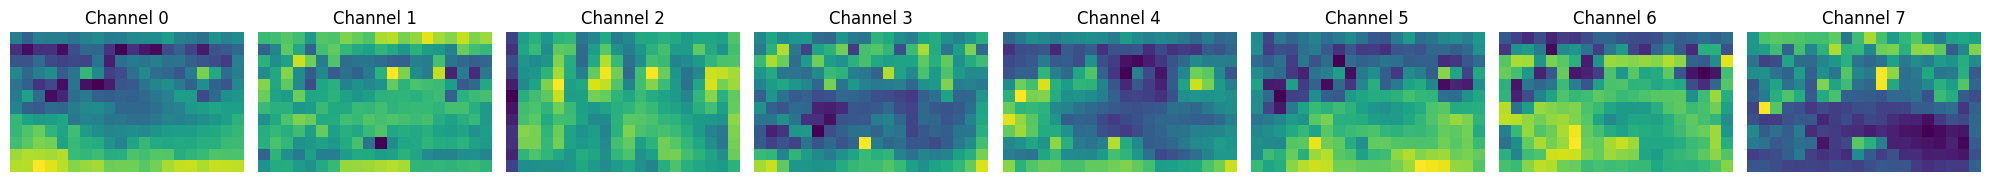

Visualizing output of layer: Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))


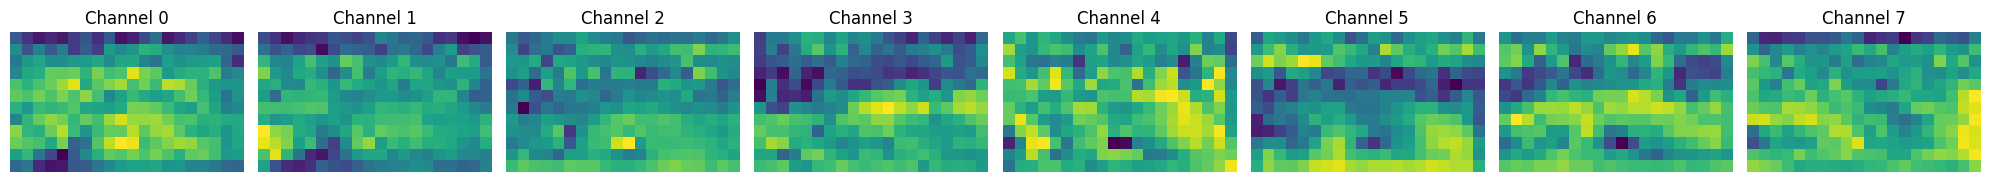

Visualizing output of layer: Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))


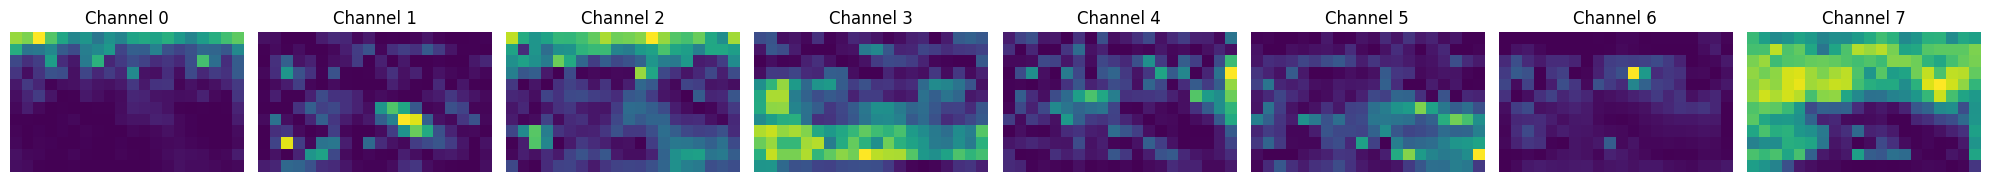

Visualizing output of layer: Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))


In [ ]:
# visualize intermediate layers
import matplotlib.pyplot as plt

for layer, map in intermediate_layers.items():
  print(f"Visualizing output of layer: {layer}")
  if map.ndim == 4:
    feature_map = map[0] # Select the first image in the batch
    num_channels_to_visualize = min(feature_map.shape[0], 8)
    fig, axes = plt.subplots(1, num_channels_to_visualize, figsize=(20, 4))
    if num_channels_to_visualize == 1:
      axes.imshow(feature_map[0].cpu().numpy(), cmap='viridis')
      axes.set_title(f'Channel 0')
      axes.axis('off')
    else:
      for i in range(num_channels_to_visualize):
        ax = axes[i]
        ax.imshow(feature_map[i].cpu().numpy(), cmap='viridis')
        ax.set_title(f'Channel {i}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()
  else:
      print(f"Skipping visualization for layer {layer} as it does not appear to be a feature map (shape: {map.shape}).")

In [13]:
#task 2 - deepsort
import cv2
import numpy as np

In [14]:
import tensorflow.compat.v1 as tf
import scipy.linalg
from scipy.optimize import linear_sum_assignment

In [15]:
# Define Detection class here as it's needed by object_tracking
class Detection(object):
    """
    This class represents a bounding box detection in a single image frame.

    Parameters
    ----------
    tlwh : array_like
        Bounding box in format `(x, y, w, h)`.
    confidence : float
        Detector confidence score.
    class_id : int
        Class label.
    feature : array_like
        A feature vector that describes the object contained in this image patch.

    Attributes
    ----------
    tlwh : ndarray
        Bounding box in format `(x, y, w, h)`.
    confidence : float
        Detector confidence score.
    class_id : int
        Class label.
    feature : ndarray
        A feature vector that describes the object contained in this image patch.

    """

    def __init__(self, tlwh, confidence, class_id, feature):
        self.tlwh = np.asarray(tlwh, dtype=float)
        self.confidence = float(confidence)
        self.class_id = int(class_id)
        self.feature = np.asarray(feature, dtype=np.float32)

    def to_tlbr(self):
        """Convert bounding box to format `(min x, min y, max x, max y)`, i.e.,
        (top left, bottom right).
        """
        ret = self.tlwh.copy()
        ret[2:] += ret[:2] #ret[:2] contains first two elements (x, y), ret[2:] has rest of array (w, h)
        return ret

    def to_xyah(self):
        """Convert bounding box to format `(center x, center y, aspect ratio,
        height)`, where the aspect ratio is `width / height`.
        """
        ret = self.tlwh.copy()
        ret[:2] += ret[2:] / 2
        ret[2] /= ret[3] #becomes aspect ratio (width / height)
        return ret

    def get_class(self):
        return self.class_id

In [16]:
class ImageEncoder(object):

    def __init__(self, checkpoint_filename, input_name="images", output_name="features"):
        self.session = tf.Session()
        with tf.gfile.GFile(checkpoint_filename, "pt") as file_handle:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(file_handle.read())
        tf.import_graph_def(graph_def)
        try:
            self.input_var = tf.get_default_graph().get_tensor_by_name(input_name)
            self.output_var = tf.get_default_graph().get_tensor_by_name(output_name)
        except KeyError:
            layers = [i.name for i in tf.get_default_graph().get_operations()]
            self.input_var = tf.get_default_graph().get_tensor_by_name(layers[0]+':0')
            self.output_var = tf.get_default_graph().get_tensor_by_name(layers[-1]+':0')

        assert len(self.output_var.get_shape()) == 2
        assert len(self.input_var.get_shape()) == 4
        self.feature_dim = self.output_var.get_shape().as_list()[-1]
        self.image_shape = self.input_var.get_shape().as_list()[1:]

    def __call__(self, data_x, batch_size=32):
        out = np.zeros((len(data_x), self.feature_dim), np.float32)
        _run_in_batches(
            lambda x: self.session.run(self.output_var, feed_dict=x),
            {self.input_var: data_x}, out, batch_size)
        return out

In [17]:
import os
def _run_in_batches(f, data_dict, out, batch_size):
    data_len = len(out)
    num_batches = int(data_len / batch_size)

    s, e = 0, 0 #start and end index
    for i in range(num_batches):
        s, e = i * batch_size, (i + 1) * batch_size
        batch_data_dict = {k: v[s:e] for k, v in data_dict.items()}
        out[s:e] = f(batch_data_dict)
    if e < len(out):
        batch_data_dict = {k: v[e:] for k, v in data_dict.items()}
        out[e:] = f(batch_data_dict)


def extract_image_patch(image, bbox, patch_shape):
    """Extract image patch from bounding box.
    Parameters
    ----------
    image : ndarray
        The full image.
    bbox : array_like
        The bounding box in format (x, y, width, height).
    patch_shape : Optional[array_like]
        This parameter can be used to enforce a desired patch shape
        (height, width). First, the `bbox` is adapted to the aspect ratio
        of the patch shape, then it is clipped at the image boundaries.
        If None, the shape is computed from :arg:`bbox`.
    Returns
    -------
    ndarray | NoneType
        An image patch showing the :arg:`bbox`, optionally reshaped to
        :arg:`patch_shape`.
        Returns None if the bounding box is empty or fully outside of the image
        boundaries.
    """
    bbox = np.array(bbox)
    if patch_shape is not None:
        # correct aspect ratio to patch shape
        target_aspect = float(patch_shape[1]) / patch_shape[0]
        new_width = target_aspect * bbox[3]
        bbox[0] -= (new_width - bbox[2]) / 2
        bbox[2] = new_width

    # convert to top left, bottom right
    bbox[2:] += bbox[:2]
    bbox = bbox.astype(np.int)

    # clip at image boundaries
    bbox[:2] = np.maximum(0, bbox[:2])
    bbox[2:] = np.minimum(np.asarray(image.shape[:2][::-1]) - 1, bbox[2:])
    if np.any(bbox[:2] >= bbox[2:]):
        return None
    sx, sy, ex, ey = bbox
    image = image[sy:ey, sx:ex]
    image = cv2.resize(image, tuple(patch_shape[::-1]))
    return image

def create_box_encoder(model_filename, input_name="images:0", output_name="features:0", batch_size=32):
    image_encoder = ImageEncoder(model_filename, input_name, output_name)
    image_shape = image_encoder.image_shape

    def encoder(image, boxes):
        image_patches = []
        for box in boxes:
            patch = extract_image_patch(image, box, image_shape[:2])
            if patch is None:
                print("WARNING: Failed to extract image patch: %s." % str(box))
                patch = np.random.uniform(0., 255., image_shape).astype(np.uint8)
            image_patches.append(patch)
        image_patches = np.asarray(image_patches)
        return image_encoder(image_patches, batch_size)

    return encoder


def generate_detections(encoder, mot_dir, output_dir, detection_dir=None):
    """Generate detections with features.
    Parameters
    ----------
    encoder : Callable[image, ndarray] -> ndarray
        The encoder function takes as input a BGR color image and a matrix of
        bounding boxes in format `(x, y, w, h)` and returns a matrix of
        corresponding feature vectors.
    mot_dir : str
        Path to the MOTChallenge directory (can be either train or test).
    output_dir
        Path to the output directory. Will be created if it does not exist.
    detection_dir
        Path to custom detections. The directory structure should be the default
        MOTChallenge structure: `[sequence]/det/det.txt`. If None, uses the
        standard MOTChallenge detections.
    """
    if detection_dir is None:
        detection_dir = mot_dir
    try:
        os.makedirs(output_dir)
    except OSError as exception:
        if exception.errno == errno.EEXIST and os.path.isdir(output_dir):
            pass
        else:
            raise ValueError(
                "Failed to created output directory '%s'" % output_dir)

    for sequence in os.listdir(mot_dir):
        print("Processing %s" % sequence)
        sequence_dir = os.path.join(mot_dir, sequence)

        image_dir = os.path.join(sequence_dir, "img1")
        image_filenames = {
            int(os.path.splitext(f)[0]): os.path.join(image_dir, f)
            for f in os.listdir(image_dir)}

        detection_file = os.path.join(
            detection_dir, sequence, "det/det.txt")
        detections_in = np.loadtxt(detection_file, delimiter=',')
        detections_out = []

        frame_indices = detections_in[:, 0].astype(np.int)
        min_frame_idx = frame_indices.astype(np.int).min()
        max_frame_idx = frame_indices.astype(np.int).max()
        for frame_idx in range(min_frame_idx, max_frame_idx + 1):
            print("Frame %05d/%05d" % (frame_idx, max_frame_idx))
            mask = frame_indices == frame_idx
            rows = detections_in[mask]

            if frame_idx not in image_filenames:
                print("WARNING could not find image for frame %d" % frame_idx)
                continue
            bgr_image = cv2.imread(
                image_filenames[frame_idx], cv2.IMREAD_COLOR)
            features = encoder(bgr_image, rows[:, 2:6].copy())
            detections_out += [np.r_[(row, feature)] for row, feature
                               in zip(rows, features)]

        output_filename = os.path.join(output_dir, "%s.npy" % sequence)
        np.save(
            output_filename, np.asarray(detections_out), allow_pickle=False)

In [18]:
#Tracking
class TrackState:
    """
    Enumeration type for the single target track state. Newly created tracks are
    classified as `tentative` until enough evidence has been collected. Then,
    the track state is changed to `confirmed`. Tracks that are no longer alive
    are classified as `deleted` to mark them for removal from the set of active
    tracks.
    """

    Tentative = 1
    Confirmed = 2
    Deleted = 3


class Track:
    """
    A single target track with state space `(x, y, a, h)` and associated
    velocities, where `(x, y)` is the center of the bounding box, `a` is the
    aspect ratio and `h` is the height.
    Parameters
    ----------
    mean : ndarray
        Mean vector of the initial state distribution.
    covariance : ndarray
        Covariance matrix of the initial state distribution.
    track_id : int
        A unique track identifier.
    n_init : int
        Number of consecutive detections before the track is confirmed. The
        track state is set to `Deleted` if a miss occurs within the first
        `n_init` frames.
    max_age : int
        The maximum number of consecutive misses before the track state is
        set to `Deleted`.
    feature : Optional[ndarray]
        Feature vector of the detection this track originates from. If not None,
        this feature is added to the `features` cache.
    Attributes
    ----------
    mean : ndarray
        Mean vector of the initial state distribution.
    covariance : ndarray
        Covariance matrix of the initial state distribution.
    track_id : int
        A unique track identifier.
    hits : int
        Total number of measurement updates.
    age : int
        Total number of frames since first occurance.
    time_since_update : int
        Total number of frames since last measurement update.
    state : TrackState
        The current track state.
    features : List[ndarray]
        A cache of features. On each measurement update, the associated feature
        vector is added to this list.
    """

    def __init__(self, mean, covariance, track_id, n_init, max_age,
                 feature=None, class_name=None):
        self.mean = mean
        self.covariance = covariance
        self.track_id = track_id
        self.hits = 1
        self.age = 1
        self.time_since_update = 0

        self.state = TrackState.Tentative
        self.features = []
        if feature is not None:
            self.features.append(feature)

        self._n_init = n_init
        self._max_age = max_age
        self.class_name = class_name

    def to_tlwh(self):
        """Get current position in bounding box format `(top left x, top left y,
        width, height)`.
        Returns
        -------
        ndarray
            The bounding box.
        """
        ret = self.mean[:4].copy() #copies first four elements [x,y,a,h]
        ret[2] *= ret[3] #calculates width (aspect ratio * height)
        ret[:2] -= ret[2:] / 2 #converts from center to top left (x_center - width/2, y_center - height/2)
        return ret

    def to_tlbr(self):
        """Get current position in bounding box format `(min x, miny, max x,
        max y)`.
        Returns
        -------
        ndarray
            The bounding box.
        """
        ret = self.to_tlwh()
        ret[2:] = ret[:2] + ret[2:] #w + min x, h + minY --> max x, max y
        return ret

    def get_class(self):
        return self.class_name

    def predict(self, kf):
        """Propagate the state distribution to the current time step using a
        Kalman filter prediction step.
        Parameters
        ----------
        kf : kalman_filter.KalmanFilter
            The Kalman filter.
        """
        self.mean, self.covariance = kf.predict(self.mean, self.covariance) #kalman filter's predict method called
        self.age += 1
        self.time_since_update += 1

    def update(self, kf, detection):
        """Perform Kalman filter measurement update step and update the feature
        cache.
        Parameters
        ----------
        kf : kalman_filter.KalmanFilter
            The Kalman filter.
        detection : Detection
            The associated detection.
        """
        self.mean, self.covariance = kf.update( #gets updated mean and covariance matrices based on new measurement
            self.mean, self.covariance, detection.to_xyah())
        self.features.append(detection.feature) #store feature vector

        self.hits += 1 #successful updates to state
        self.time_since_update = 0 #most recently updated - will get priority in cascade matching
        if self.state == TrackState.Tentative and self.hits >= self._n_init:
            self.state = TrackState.Confirmed

    def mark_missed(self):
        """Mark this track as missed (no association at the current time step).
        """
        if self.state == TrackState.Tentative:
            self.state = TrackState.Deleted
        elif self.time_since_update > self._max_age:
            self.state = TrackState.Deleted

    def is_tentative(self):
        """Returns True if this track is tentative (unconfirmed).
        """
        return self.state == TrackState.Tentative

    def is_confirmed(self):
        """Returns True if this track is confirmed."""
        return self.state == TrackState.Confirmed

    def is_deleted(self):
        """Returns True if this track is dead and should be deleted."""
        return self.state == TrackState.Deleted

In [20]:
class Tracker:
    """
    This is the multi-target tracker.
    Parameters
    ----------
    metric : nn_matching.NearestNeighborDistanceMetric
        A distance metric for measurement-to-track association.
    max_age : int
        Maximum number of missed misses before a track is deleted.
    n_init : int
        Number of consecutive detections before the track is confirmed. The
        track state is set to `Deleted` if a miss occurs within the first
        `n_init` frames.
    Attributes
    ----------
    metric : nn_matching.NearestNeighborDistanceMetric
        The distance metric used for measurement to track association.
    max_age : int
        Maximum number of missed misses before a track is deleted.
    n_init : int
        Number of frames that a track remains in initialization phase.
    kf : kalman_filter.KalmanFilter
        A Kalman filter to filter target trajectories in image space.
    tracks : List[Track]
        The list of active tracks at the current time step.
    """

    def __init__(self, metric, max_iou_distance=0.7, max_age=30, n_init=3):
        self.metric = metric
        self.max_iou_distance = max_iou_distance
        self.max_age = max_age
        self.n_init = n_init

        self.kf = KalmanFilter()
        self.tracks = []
        self._next_id = 1

    def predict(self):
        """Propagate track state distributions one time step forward.
        This function should be called once every time step, before `update`.
        """
        for track in self.tracks:
            track.predict(self.kf)

    def update(self, detections):
        """Perform measurement update and track management.
        Parameters
        ----------
        detections : List[deep_sort.detection.Detection]
            A list of detections at the current time step.
        """
        # Run matching cascade.
        matches, unmatched_tracks, unmatched_detections = self._match(detections)

        # Update track set.
        for track_idx, detection_idx in matches:
          track = self.tracks[track_idx]
          detection = detections[detection_idx]
          if track.class_name == 'sports ball':
            person_pos = self.kf._std_weight_position
            person_vel = self.kf._std_weight_velocity
            self.kf._std_weight_position = 1./8
            self.kf._std_weight_velocity = 1./40
          track.update(self.kf, detection)
          if track.class_name == 'sports ball':
            self.kf._std_weight_position = person_pos
            self.kf._std_weight_velocity = person_vel

        for track_idx, detection_idx in matches: #[(track_idx, detection, idx)...]
            self.tracks[track_idx].update(
                self.kf, detections[detection_idx]) #if match is (0,2) that means track 0 is updated with the measurement of detection 2
        for track_idx in unmatched_tracks:
            self.tracks[track_idx].mark_missed() #unmatched tracks call mark_missed
        for detection_idx in unmatched_detections:
            self._initiate_track(detections[detection_idx]) #creates new tracks for detection without associated track
        self.tracks = [t for t in self.tracks if not t.is_deleted()]

        # Update distance metric.
        active_targets = [t.track_id for t in self.tracks if t.is_confirmed()]
        features, targets = [], []
        for track in self.tracks:
            if not track.is_confirmed():
                continue
            features += track.features
            targets += [track.track_id for _ in track.features]
            track.features = [] #prevents duplicate training
        self.metric.partial_fit(
            np.asarray(features), np.asarray(targets), active_targets)

    def _match(self, detections):

        def gated_metric(tracks, dets, track_indices, detection_indices):
            features = np.array([dets[i].feature for i in detection_indices]) #appearance similarity
            targets = np.array([tracks[i].track_id for i in track_indices])
            cost_matrix = self.metric.distance(features, targets)  #computes similarity between detection to each track
            cost_matrix = gate_cost_matrix( #marks impossible associations as too expensive
                self.kf, cost_matrix, tracks, dets, track_indices,
                detection_indices)

            return cost_matrix

        # Split track set into confirmed and unconfirmed tracks.
        confirmed_tracks = [
            i for i, t in enumerate(self.tracks) if t.is_confirmed()]
        unconfirmed_tracks = [
            i for i, t in enumerate(self.tracks) if not t.is_confirmed()]

        # Associate confirmed tracks using appearance features.
        matches_a, unmatched_tracks_a, unmatched_detections = \
                matching_cascade(
                gated_metric, self.metric.matching_threshold, self.max_age,
                self.tracks, detections, confirmed_tracks)

        # Associate remaining tracks together with unconfirmed tracks using IOU.
        iou_track_candidates = unconfirmed_tracks + [
            k for k in unmatched_tracks_a if
            self.tracks[k].time_since_update == 1]
        unmatched_tracks_a = [
            k for k in unmatched_tracks_a if
            self.tracks[k].time_since_update != 1]
        matches_b, unmatched_tracks_b, unmatched_detections = min_cost_matching(iou_cost, self.max_iou_distance, self.tracks, detections, iou_track_candidates, unmatched_detections)#uses IOU distance for matching "second chance" tracks
        matches = matches_a + matches_b
        unmatched_tracks = list(set(unmatched_tracks_a + unmatched_tracks_b))
        return matches, unmatched_tracks, unmatched_detections

    def _initiate_track(self, detection):
        mean, covariance = self.kf.initiate(detection.to_xyah())
        class_name = detection.get_class()
        self.tracks.append(Track(
            mean, covariance, self._next_id, self.n_init, self.max_age,
            detection.feature, class_name))
        self._next_id += 1

In [21]:
def _pdist(a, b):
    """Compute pair-wise squared distance between points in `a` and `b`.
    Parameters
    ----------
    a : array_like
        An NxM matrix of N samples of dimensionality M.
    b : array_like
        An LxM matrix of L samples of dimensionality M.
    Returns
    -------
    ndarray
        Returns a matrix of size len(a), len(b) such that eleement (i, j)
        contains the squared distance between `a[i]` and `b[j]`.
    """
    a, b = np.asarray(a), np.asarray(b)
    if len(a) == 0 or len(b) == 0:
        return np.zeros((len(a), len(b)))
    a2, b2 = np.square(a).sum(axis=1), np.square(b).sum(axis=1) #get sum for each row (across columns)
    r2 = -2. * np.dot(a, b.T) + a2[:, None] + b2[None, :] #(a-b)^T(a-b)
    r2 = np.clip(r2, 0., float(np.inf)) #no negatives
    return r2


def _cosine_distance(a, b, data_is_normalized=False):
    """Compute pair-wise cosine distance between points in `a` and `b`.
    Parameters
    ----------
    a : array_like
        An NxM matrix of N samples of dimensionality M.
    b : array_like
        An LxM matrix of L samples of dimensionality M.
    data_is_normalized : Optional[bool]
        If True, assumes rows in a and b are unit length vectors.
        Otherwise, a and b are explicitly normalized to lenght 1.
    Returns
    -------
    ndarray
        Returns a matrix of size len(a), len(b) such that eleement (i, j)
        contains the squared distance between `a[i]` and `b[j]`.
    """
    if not data_is_normalized: #cosine similarity = (a·b) / (‖a‖ * ‖b‖)
        a = np.asarray(a) / np.linalg.norm(a, axis=1, keepdims=True)
        b = np.asarray(b) / np.linalg.norm(b, axis=1, keepdims=True)
    return 1. - np.dot(a, b.T) #cosine distance = 1 - cosine similarity


def _nn_euclidean_distance(x, y):
    """ Helper function for nearest neighbor distance metric (Euclidean).
    Parameters
    ----------
    x : ndarray
        A matrix of N row-vectors (sample points).
    y : ndarray
        A matrix of M row-vectors (query points).
    Returns
    -------
    ndarray
        A vector of length M that contains for each entry in `y` the
        smallest Euclidean distance to a sample in `x`.
    """
    distances = _pdist(x, y)
    return np.maximum(0.0, distances.min(axis=0))


def _nn_cosine_distance(x, y):
    """ Helper function for nearest neighbor distance metric (cosine).
    Parameters
    ----------
    x : ndarray
        A matrix of N row-vectors (sample points).
    y : ndarray
        A matrix of M row-vectors (query points).
    Returns
    -------
    ndarray
        A vector of length M that contains for each entry in `y` the
        smallest cosine distance to a sample in `x`.
    """
    distances = _cosine_distance(x, y)
    return distances.min(axis=0)


class NearestNeighborDistanceMetric(object):
    """
    A nearest neighbor distance metric that, for each target, returns
    the closest distance to any sample that has been observed so far.
    Parameters
    ----------
    metric : str
        Either "euclidean" or "cosine".
    matching_threshold: float
        The matching threshold. Samples with larger distance are considered an
        invalid match.
    budget : Optional[int]
        If not None, fix samples per class to at most this number. Removes
        the oldest samples when the budget is reached.
    Attributes
    ----------
    samples : Dict[int -> List[ndarray]]
        A dictionary that maps from target identities to the list of samples
        that have been observed so far.
    """

    def __init__(self, metric, matching_threshold, budget=None):


        if metric == "euclidean":
            self._metric = _nn_euclidean_distance
        elif metric == "cosine":
            self._metric = _nn_cosine_distance
        else:
            raise ValueError(
                "Invalid metric; must be either 'euclidean' or 'cosine'")
        self.matching_threshold = matching_threshold
        self.budget = budget
        self.samples = {}

    def partial_fit(self, features, targets, active_targets):
        """Update the distance metric with new data.
        Parameters
        ----------
        features : ndarray
            An NxM matrix of N features of dimensionality M.
        targets : ndarray
            An integer array of associated target identities.
        active_targets : List[int]
            A list of targets that are currently present in the scene.
        """
        for feature, target in zip(features, targets):
            self.samples.setdefault(target, []).append(feature) #if target exists return value otherwise create target = []
            if self.budget is not None:
                self.samples[target] = self.samples[target][-self.budget:]
        self.samples = {k: self.samples[k] for k in active_targets}

    def distance(self, features, targets):
        """Compute distance between features and targets.
        Parameters
        ----------
        features : ndarray
            An NxM matrix of N features of dimensionality M.
        targets : List[int]
            A list of targets to match the given `features` against.
        Returns
        -------
        ndarray
            Returns a cost matrix of shape len(targets), len(features), where
            element (i, j) contains the closest squared distance between
            `targets[i]` and `features[j]`.
        """
        cost_matrix = np.zeros((len(targets), len(features)))
        for i, target in enumerate(targets):
            cost_matrix[i, :] = self._metric(self.samples[target], features) #compute distances between track and detection features and stores min distance for each feature in a row vector of cost matrix
        return cost_matrix #hungarian algorithm will handle padding for square matrix internally

In [22]:
"""
Table for the 0.95 quantile of the chi-square distribution with N degrees of
freedom (contains values for N=1, ..., 9). Taken from MATLAB/Octave's chi2inv
function and used as Mahalanobis gating threshold.
"""

chi2inv95 = {
    1: 3.8415,
    2: 5.9915,
    3: 7.8147,
    4: 9.4877,
    5: 11.070,
    6: 12.592,
    7: 14.067,
    8: 15.507,
    9: 16.919}

class KalmanFilter(object):
    """
    A simple Kalman filter for tracking bounding boxes in image space.
    The 8-dimensional state space
        x, y, a, h, vx, vy, va, vh
    contains the bounding box center position (x, y), aspect ratio a, height h,
    and their respective velocities.
    Object motion follows a constant velocity model. The bounding box location
    (x, y, a, h) is taken as direct observation of the state space (linear
    observation model).
    """

    def __init__(self):
        ndim, dt = 4, 1. #dimensions, time step

        # Create Kalman filter model matrices.
        self._motion_mat = np.eye(2 * ndim, 2 * ndim) #initialization of 8x8 state transition matrix (identity)
        for i in range(ndim): # constant velocity, so we just want to add dt to the position rows
            self._motion_mat[i, ndim + i] = dt #new position = old position + velocity * dt -- associates position with corresponding velocity
        self._update_mat = np.eye(ndim, 2 * ndim) #4 x 8 matrix (only "selects" the position compnents from the full state vector)

        # Motion and observation uncertainty are chosen relative to the current
        # state estimate. These weights control the amount of uncertainty in
        # the model. This is a bit hacky.
        self._std_weight_position = 1. / 10
        self._std_weight_velocity = 1. / 80

    def initiate(self, measurement):
        """Create track from unassociated measurement.
        Parameters
        ----------
        measurement : ndarray
            Bounding box coordinates (x, y, a, h) with center position (x, y),
            aspect ratio a, and height h.
        Returns
        -------
        (ndarray, ndarray)
            Returns the mean vector (8 dimensional) and covariance matrix (8x8
            dimensional) of the new track. Unobserved velocities are initialized
            to 0 mean.
        """
        mean_pos = measurement
        mean_vel = np.zeros_like(mean_pos) #velocities initialized to same shape as mean_pos but filled with 0's
        mean = np.r_[mean_pos, mean_vel] #concactenates mean_pos and mean_vel along row-axis to get 1 x 8 state vector

        std = [ #initial covariance matrix
            2 * self._std_weight_position * measurement[3], #uncertainties scaled by object size (height)
            2 * self._std_weight_position * measurement[3],
            1e-2, #aspect ratio doesn't change much, uncertainty very small
            2 * self._std_weight_position * measurement[3],
            10 * self._std_weight_velocity * measurement[3],
            10 * self._std_weight_velocity * measurement[3],
            1e-5,
            10 * self._std_weight_velocity * measurement[3]]
        covariance = np.diag(np.square(std)) #squares each element and creates a diagonal matrix with these values (covariance matrix)
        return mean, covariance

    def predict(self, mean, covariance):
        """Run Kalman filter prediction step.
        Parameters
        ----------
        mean : ndarray
            The 8 dimensional mean vector of the object state at the previous
            time step.
        covariance : ndarray
            The 8x8 dimensional covariance matrix of the object state at the
            previous time step.
        Returns
        -------
        (ndarray, ndarray)
            Returns the mean vector and covariance matrix of the predicted
            state. Unobserved velocities are initialized to 0 mean.
        """
        std_pos = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-2,
            self._std_weight_position * mean[3]]
        std_vel = [
            self._std_weight_velocity * mean[3],
            self._std_weight_velocity * mean[3],
            1e-5,
            self._std_weight_velocity * mean[3]]
        motion_cov = np.diag(np.square(np.r_[std_pos, std_vel])) #concactenates the 4D uncertainty vectors, then squares and diagonalizes

        mean = np.dot(self._motion_mat, mean) #predicted state: dot product between state transition matrix and current state mean (xₖ⁻ = F · xₖ₋₁)
        covariance = np.linalg.multi_dot((
            self._motion_mat, covariance, self._motion_mat.T)) + motion_cov #predicted covariance (Pₖ⁻ = F · Pₖ₋₁ · Fᵀ + Q), adds noise

        return mean, covariance

    def project(self, mean, covariance):
        """Project state distribution to measurement space.
        Parameters
        ----------
        mean : ndarray
            The state's mean vector (8 dimensional array).
        covariance : ndarray
            The state's covariance matrix (8x8 dimensional).
        Returns
        -------
        (ndarray, ndarray)
            Returns the projected mean and covariance matrix of the given state
            estimate.
        """
        std = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-1,
            self._std_weight_position * mean[3]]
        innovation_cov = np.diag(np.square(std)) #creates a diagonal measurement noise covariance

        mean = np.dot(self._update_mat, mean) #converts 8D matrix to a 4d matrix with just positions
        covariance = np.linalg.multi_dot((
            self._update_mat, covariance, self._update_mat.T)) #converts 8x8 covariance to 4x4 covariance
        return mean, covariance + innovation_cov #adds noise

    def update(self, mean, covariance, measurement):
        """Run Kalman filter correction step.
        Parameters
        ----------
        mean : ndarray
            The predicted state's mean vector (8 dimensional).
        covariance : ndarray
            The state's covariance matrix (8x8 dimensional).
        measurement : ndarray
            The 4 dimensional measurement vector (x, y, a, h), where (x, y)
            is the center position, a the aspect ratio, and h the height of the
            bounding box.
        Returns
        -------
        (ndarray, ndarray)
            Returns the measurement-corrected state distribution.
        """
        projected_mean, projected_cov = self.project(mean, covariance)

        chol_factor, lower = scipy.linalg.cho_factor( #projected_cov = L·Lᵀ --> stores lower triangular matrix L, and lower = True
            projected_cov, lower=True, check_finite=False) #Cholesky decomposition to calculate Kalman gain
        kalman_gain = scipy.linalg.cho_solve( #K = P · Hᵀ · S⁻¹ (covariance matrix * transpose of observation matrix * inverse of projected_cov)
            (chol_factor, lower), np.dot(covariance, self._update_mat.T).T, #solves S · Kᵀ = (P·Hᵀ)ᵀ
            check_finite=False).T
        innovation = measurement - projected_mean #difference between predicted and actual positions

        new_mean = mean + np.dot(innovation, kalman_gain.T) #updates state estimate
        new_covariance = covariance - np.linalg.multi_dot(( #P_new = P_old - K · S · Kᵀ
            kalman_gain, projected_cov, kalman_gain.T)) #incorporating new information, so uncertainty decreases
        return new_mean, new_covariance

    def gating_distance(self, mean, covariance, measurements, #Mahalanobis distance
                        only_position=False):
        """Compute gating distance between state distribution and measurements.
        A suitable distance threshold can be obtained from `chi2inv95`. If
        `only_position` is False, the chi-square distribution has 4 degrees of
        freedom, otherwise 2.
        Parameters
        ----------
        mean : ndarray
            Mean vector over the state distribution (8 dimensional).
        covariance : ndarray
            Covariance of the state distribution (8x8 dimensional).
        measurements : ndarray
            An Nx4 dimensional matrix of N measurements, each in
            format (x, y, a, h) where (x, y) is the bounding box center
            position, a the aspect ratio, and h the height.
        only_position : Optional[bool]
            If True, distance computation is done with respect to the bounding
            box center position only.
        Returns
        -------
        ndarray
            Returns an array of length N, where the i-th element contains the
            squared Mahalanobis distance between (mean, covariance) and
            `measurements[i]`.
        """
        mean, covariance = self.project(mean, covariance)
        if only_position:
            mean, covariance = mean[:2], covariance[:2, :2]
            measurements = measurements[:, :2] #all rows but only first two columns

        cholesky_factor = np.linalg.cholesky(covariance)
        d = measurements - mean
        z = scipy.linalg.solve_triangular( #cholesky_factor × z = d.T
            cholesky_factor, d.T, lower=True, check_finite=False,
            overwrite_b=True)
        squared_maha = np.sum(z * z, axis=0) #euclidean distance (squared)
        return squared_maha

In [ ]:
#assignment problem
INFTY_COST = 1e+5

def min_cost_matching(
        distance_metric, max_distance, tracks, detections, track_indices=None,
        detection_indices=None):
    """Solve linear assignment problem.
    Parameters
    ----------
    distance_metric : Callable[List[Track], List[Detection], List[int], List[int]) -> ndarray
        The distance metric is given a list of tracks and detections as well as
        a list of N track indices and M detection indices. The metric should
        return the NxM dimensional cost matrix, where element (i, j) is the
        association cost between the i-th track in the given track indices and
        the j-th detection in the given detection_indices.
    max_distance : float
        Gating threshold. Associations with cost larger than this value are
        disregarded.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : List[int]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above).
    detection_indices : List[int]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above).
    Returns
    -------
    (List[(int, int)], List[int], List[int])
        Returns a tuple with the following three entries:
        * A list of matched track and detection indices.
        * A list of unmatched track indices.
        * A list of unmatched detection indices.
    """
    if track_indices is None: #without specific indices, use all tracks and detections
        track_indices = np.arange(len(tracks))
    if detection_indices is None:
        detection_indices = np.arange(len(detections))

    if len(detection_indices) == 0 or len(track_indices) == 0:
        return [], track_indices, detection_indices  # Nothing to match.

    cost_matrix = distance_metric( #N X M matrix where N = tracks, M = detections, and values are distance/cost)
        tracks, detections, track_indices, detection_indices)
    cost_matrix[cost_matrix > max_distance] = max_distance + 1e-5 #values above max_distance set to high values to remove potential matches
    indices = linear_sum_assignment(cost_matrix) #returns a tuple of two arrays
    indices = np.asarray(indices)
    indices = np.transpose(indices) #each row now represents a match
    #constraint - each detection gets a track (each row is "assigned" a different col and vice versa)
    matches, unmatched_tracks, unmatched_detections = [], [], [] #cost matrix is padded to be square if there's an uneven number of matches and tracks
    for col, detection_idx in enumerate(detection_indices): #find unmatched detections
        if col not in indices[:, 1]:
            unmatched_detections.append(detection_idx)
    for row, track_idx in enumerate(track_indices): #find unmatched tracks
        if row not in indices[:, 0]:
            unmatched_tracks.append(track_idx)
    for row, col in indices:
        track_idx = track_indices[row]
        detection_idx = detection_indices[col]
        if cost_matrix[row, col] > max_distance: #make sure cost is within gating threshold
            unmatched_tracks.append(track_idx)
            unmatched_detections.append(detection_idx)
        else:
            matches.append((track_idx, detection_idx))
    return matches, unmatched_tracks, unmatched_detections


def matching_cascade(
        distance_metric, max_distance, cascade_depth, tracks, detections,
        track_indices=None, detection_indices=None):
    """Run matching cascade.
    Parameters
    ----------
    distance_metric : Callable[List[Track], List[Detection], List[int], List[int]) -> ndarray
        The distance metric is given a list of tracks and detections as well as
        a list of N track indices and M detection indices. The metric should
        return the NxM dimensional cost matrix, where element (i, j) is the
        association cost between the i-th track in the given track indices and
        the j-th detection in the given detection indices.
    max_distance : float
        Gating threshold. Associations with cost larger than this value are
        disregarded.
    cascade_depth: int
        The cascade depth, should be se to the maximum track age.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : Optional[List[int]]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above). Defaults to all tracks.
    detection_indices : Optional[List[int]]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above). Defaults to all
        detections.
    Returns
    -------
    (List[(int, int)], List[int], List[int])
        Returns a tuple with the following three entries:
        * A list of matched track and detection indices.
        * A list of unmatched track indices.
        * A list of unmatched detection indices.
    """
    if track_indices is None:
        track_indices = list(range(len(tracks)))
    if detection_indices is None:
        detection_indices = list(range(len(detections)))

    unmatched_detections = detection_indices #haven't started matching yet
    matches = []
    for level in range(cascade_depth):
        if len(unmatched_detections) == 0:  # No detections left
            break

        track_indices_l = [
            k for k in track_indices
            if tracks[k].time_since_update == 1 + level #get most recently updated tracks first
        ]
        if len(track_indices_l) == 0:  # Nothing to match at this level
            continue

        matches_l, _, unmatched_detections = min_cost_matching(distance_metric, max_distance, tracks, detections, track_indices_l, unmatched_detections) #returns matches, unmatched tracks, unmatched detections
        matches += matches_l
    unmatched_tracks = list(set(track_indices) - set(k for k, _ in matches)) #all indices - matched indices (global approach)
    return matches, unmatched_tracks, unmatched_detections


def gate_cost_matrix(
        kf, cost_matrix, tracks, detections, track_indices, detection_indices,
        gated_cost=INFTY_COST, only_position=False):
    """Invalidate infeasible entries in cost matrix based on the state
    distributions obtained by Kalman filtering.
    Parameters
    ----------
    kf : The Kalman filter.
    cost_matrix : ndarray
        The NxM dimensional cost matrix, where N is the number of track indices
        and M is the number of detection indices, such that entry (i, j) is the
        association cost between `tracks[track_indices[i]]` and
        `detections[detection_indices[j]]`.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : List[int]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above).
    detection_indices : List[int]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above).
    gated_cost : Optional[float]
        Entries in the cost matrix corresponding to infeasible associations are
        set this value. Defaults to a very large value.
    only_position : Optional[bool]
        If True, only the x, y position of the state distribution is considered
        during gating. Defaults to False.
    Returns
    -------
    ndarray
        Returns the modified cost matrix.
    """
    gating_dim = 2 if only_position else 4
    gating_threshold = chi2inv95[gating_dim]
    measurements = np.asarray(
        [detections[i].to_xyah() for i in detection_indices])
    for row, track_idx in enumerate(track_indices):
        track = tracks[track_idx]
        gating_distance = kf.gating_distance(
            track.mean, track.covariance, measurements, only_position)
        cost_matrix[row, gating_distance > gating_threshold] = gated_cost #assigned a high cost if exceeds
    return cost_matrix

In [24]:
#IOU
def iou(bbox, candidates):
    """Computer intersection over union.
    Parameters
    ----------
    bbox : ndarray
        A bounding box in format `(top left x, top left y, width, height)`.
    candidates : ndarray
        A matrix of candidate bounding boxes (one per row) in the same format
        as `bbox`.
    Returns
    -------
    ndarray
        The intersection over union in [0, 1] between the `bbox` and each
        candidate. A higher score means a larger fraction of the `bbox` is
        occluded by the candidate.
    """
    bbox_tl, bbox_br = bbox[:2], bbox[:2] + bbox[2:]
    candidates_tl = candidates[:, :2] #all top left (all rows, columns 1 & 2)
    candidates_br = candidates[:, :2] + candidates[:, 2:] #all bottom right (all rows, columns 1 & 2 + width & height)

    tl = np.c_[np.maximum(bbox_tl[0], candidates_tl[:, 0])[:, np.newaxis], #maximum of top-left
               np.maximum(bbox_tl[1], candidates_tl[:, 1])[:, np.newaxis]]
    br = np.c_[np.minimum(bbox_br[0], candidates_br[:, 0])[:, np.newaxis], #maximum of bottom-right
               np.minimum(bbox_br[1], candidates_br[:, 1])[:, np.newaxis]]
    wh = np.maximum(0., br - tl) #calculates width and height of intersection (0 if there's no intersection) - is an array

    area_intersection = wh.prod(axis=1) #multiples elements of array row-wise (gets area of each candidate)
    area_bbox = bbox[2:].prod() #bbox in the form [x, y, w, h] --> gets area of bbox
    area_candidates = candidates[:, 2:].prod(axis=1) #area of all candidate boxes
    return area_intersection / (area_bbox + area_candidates - area_intersection)


def iou_cost(tracks, detections, track_indices=None,
             detection_indices=None):
    """An intersection over union distance metric.
    Parameters
    ----------
    tracks : List[deep_sort.track.Track]
        A list of tracks.
    detections : List[deep_sort.detection.Detection]
        A list of detections.
    track_indices : Optional[List[int]]
        A list of indices to tracks that should be matched. Defaults to
        all `tracks`.
    detection_indices : Optional[List[int]]
        A list of indices to detections that should be matched. Defaults
        to all `detections`.
    Returns
    -------
    ndarray
        Returns a cost matrix of shape
        len(track_indices), len(detection_indices) where entry (i, j) is
        `1 - iou(tracks[track_indices[i]], detections[detection_indices[j]])`.
    """
    if track_indices is None:
        track_indices = np.arange(len(tracks))
    if detection_indices is None:
        detection_indices = np.arange(len(detections))

    cost_matrix = np.zeros((len(track_indices), len(detection_indices))) #initialized with zeros
    for row, track_idx in enumerate(track_indices):
        if tracks[track_idx].time_since_update > 1: #track is stale
            cost_matrix[row, :] = INFTY_COST
            continue

        bbox = tracks[track_idx].to_tlwh() #get bounding boxes for track
        candidates = np.asarray([detections[i].tlwh for i in detection_indices]) #detection bounding boxes
        cost_matrix[row, :] = 1. - iou(bbox, candidates) #cost = 1.0 - iou score
    return cost_matrix

In [25]:
# Definition of the parameters
max_cosine_distance = 0.7
max_euclidean_distance = 0.7
target_classes = [0, 32]
nn_budget = None
model_filename = 'yolo11n.pt'

# Define NUM_CLASS for mapping class IDs to names
NUM_CLASS = {
    0: 'person',
    32: 'sports ball'
}

#map class ids to names
key_list = list(NUM_CLASS.keys())
val_list = list(NUM_CLASS.values())

In [26]:
import time
import cv2
import numpy as np
from ultralytics import YOLO

# Function for object tracking on video
def object_tracking(video_path, output_path, model, tracker, target_classes, num_class_map):
    vid = cv2.VideoCapture(video_path)

    # by default VideoCapture returns float instead of int
    frame_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'mp4v') # Use mp4v codec for compatibility
    out = cv2.VideoWriter(output_path, codec, fps, (frame_width, frame_height))

    times = []

    while True:
        ret, frame = vid.read()
        if not ret:
            break

        original_frame = frame.copy()

        t1 = time.time()
        # Perform YOLO detection
        results = model(original_frame, classes=target_classes)
        t2 = time.time()
        times.append(t2 - t1)

        detections = []
        for result in results:
            if result.boxes is not None and len(result.boxes) > 0:
                boxes = result.boxes
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    class_id = box.cls[0].cpu().numpy()
                    # convert boxes to [x,y,w,h] format
                    bbox_xywh = [x1, y1, x2 - x1, y2 - y1]
                    # Get feature vector from YOLO output (using the detection box as a simple feature for now)
                    # A more sophisticated approach would involve extracting features from an intermediate layer
                    feature = np.array([x1, y1, x2, y2, conf, class_id]) # Using bbox and confidence as a dummy feature
                    detections.append(Detection(bbox_xywh, conf, class_id, feature))

        # Pass detections to the deepsort object and obtain the track information.
        tracker.predict()
        tracker.update(detections)

        # Obtain info from the tracks
        tracked_bboxes = []
        for track in tracker.tracks:
            if not track.is_confirmed() or track.time_since_update > 1: # Only plot confirmed tracks with recent updates
                continue
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            class_id = track.get_class() #Get the class ID of particular object
            tracking_id = track.track_id # Get the ID for the particular track
            class_name = num_class_map.get(class_id, 'Unknown')
            tracked_bboxes.append(bbox.tolist() + [tracking_id, class_name]) # Structure data for drawing

        # draw detection on frame
        image = original_frame.copy()
        for bbox in tracked_bboxes:
            x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
            track_id = bbox[4]
            class_name = bbox[5]
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"ID: {track_id} {class_name}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


        avg_time = sum(times) / len(times) if times else 0
        fps = 1. / avg_time if avg_time else 0

        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)

        print("Time: {:.2f}ms, FPS: {:.1f}".format(avg_time * 1000, fps))
        out.write(image)

    out.release()
    vid.release()

In [ ]:
if __name__ == '__main__':
    video_file = 'c:\\Users\\bluem\\Downloads\\Football match.mp4'
    output_dir = 'c:\\Users\\bluem\\Downloads'
    output_filename = "output_tracked.mp4"

    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, output_filename)

    if not os.path.exists(video_file):
        print(f"Error: Video file not found at '{video_file}'")
    else:
        metric = 
        object_tracking(video_file, output_path, model, tracker, target_classes, NUM_CLASS)

NameError: name 'tracker' is not defined

: 